# Reto Titanic
### Materia: TC3006C

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Open test.csv and count the number of rows
df_test = pd.read_csv('./data/test.csv')
print(df_test.shape[0])
# Open train.csv and count the number of rows
df_train = pd.read_csv('./data/train.csv')
print(df_train.shape[0])

In [81]:
# Print amount of survived and not survived passengers
# Print the amount of passengers that survived and not survived
survival_counts = df_train.groupby('Survived').size()
print(f'Passengers that survived: {survival_counts[1]} and the ones that did not: {survival_counts[0]}')
print('*'*40)

# Filter the dataset to include only men
men = df_train[df_train['Sex'] == 'male']
# Group by 'Survived' and count the number of men who survived and not survived
men_survival_counts = men.groupby('Survived').size()
print(f'Males that survived: {men_survival_counts[1]} and the ones that did not: {men_survival_counts[0]}')
print('*'*40)
female = df_train[df_train['Sex'] == 'female']
female_survival_counts = female.groupby('Survived').size()
print(f'females that survived: {female_survival_counts[1]} and the ones that did not: {female_survival_counts[0]}')

Passengers that survived: 342 and the ones that did not: 549
****************************************
Males that survived: 109 and the ones that did not: 468
****************************************
females that survived: 233 and the ones that did not: 81


---
## Análisis Exploratorio de Datos

In [70]:
# Get missing percentage per column in df_train
missing_values = df_train.isnull().mean() * 100
print(missing_values)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


---

# Ticket information feature engineering

In [71]:
df_train['Ticket'] = df_train['Ticket'].replace('LINE', 'LINE 0')
df_test['Ticket'] = df_test['Ticket'].replace('LINE', 'LINE 0')

# Parse Ticket feature
df_train['Ticket'] = df_train['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
def get_prefix(ticket):
    lead = ticket.split(' ')[0][0]
    if lead.isalpha():
        return ticket.split(' ')[0]
    else:
        return 'NoPrefix'
    
df_train['TicketPrefix'] = df_train['Ticket'].apply(lambda x: get_prefix(x))

# Separate all ticket components
df_train['Ticket_Number'] = df_train['Ticket'].apply(lambda x: int(x.split(' ')[-1])//1)
df_train['Ticket_Length'] = df_train['Ticket_Number'].apply(lambda x : len(str(x)))
df_train['Ticket_FirstDigit'] = df_train['Ticket_Number'].apply(lambda x : int(str(x)[0]))
df_train['Ticket_Group'] = df_train['Ticket'].apply(lambda x: str(int(x.split(' ')[-1])//10))

# Apply al separations for test data
df_test['Ticket'] = df_test['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
df_test['TicketPrefix'] = df_test['Ticket'].apply(lambda x: get_prefix(x))
df_test['Ticket_Number'] = df_test['Ticket'].apply(lambda x: int(x.split(' ')[-1])//1)
df_test['Ticket_Length'] = df_test['Ticket_Number'].apply(lambda x : len(str(x)))
df_test['Ticket_FirstDigit'] = df_test['Ticket_Number'].apply(lambda x : int(str(x)[0]))
df_test['Ticket_Group'] = df_test['Ticket'].apply(lambda x: str(int(x.split(' ')[-1])//10))

# Drop Ticket, Ticket_Number, Ticket_Length
df_train = df_train.drop(columns=['Ticket', 'Ticket_Number', 'Ticket_Length'])
df_test = df_test.drop(columns=['Ticket', 'Ticket_Number', 'Ticket_Length'])

In [72]:
pd.crosstab(df_train['Pclass'],df_train['Ticket_FirstDigit'],margins=True)

Ticket_FirstDigit,0,1,2,3,4,5,6,7,8,9,All
Pclass,,,,,,,,,,,
1,0,192,4,14,0,4,2,0,0,0,216
2,0,22,136,23,0,1,0,2,0,0,184
3,4,17,90,330,15,4,12,13,3,3,491
All,4,231,230,367,15,9,14,15,3,3,891


In [73]:
# Print the unique 'Prefix' in df_train
print(df_train['TicketPrefix'].unique())

['a5' 'pc' 'stono2' 'NoPrefix' 'pp' 'ca' 'scparis' 'sca4' 'a4' 'sp' 'soc'
 'wc' 'sotonoq' 'wep' 'stono' 'c' 'sop' 'fa' 'line' 'fcc' 'swpp' 'scow'
 'ppp' 'sc' 'scah' 'as' 'sopp' 'fc' 'sotono2' 'casoton']


In [74]:
# Count the frequency of each 'Prefix' in df_train
print(df_train['TicketPrefix'].value_counts())

NoPrefix    661
pc           60
ca           41
a5           21
sotonoq      15
stono        12
scparis      11
wc           10
a4            7
stono2        6
soc           6
fcc           5
c             5
line          4
wep           3
scah          3
sopp          3
pp            3
sotono2       2
swpp          2
ppp           2
fc            1
as            1
scow          1
sc            1
sp            1
fa            1
sop           1
sca4          1
casoton       1
Name: TicketPrefix, dtype: int64


---
# Drop cabin column due to the high number of missing values

In [75]:
# Drop cabin column
df_train = df_train.drop(columns=['Cabin'])
df_test = df_test.drop(columns=['Cabin'])
# Count the number of missing values in the df_train dataset
print("Train dataset")
missing_values = df_train.isnull().mean() * 100
print(missing_values)
print("*"*50)
print("Test dataset")
missing_values = df_test.isnull().mean() * 100
print(missing_values)

Train dataset
PassengerId           0.000000
Survived              0.000000
Pclass                0.000000
Name                  0.000000
Sex                   0.000000
Age                  19.865320
SibSp                 0.000000
Parch                 0.000000
Fare                  0.000000
Embarked              0.224467
TicketPrefix          0.000000
Ticket_FirstDigit     0.000000
Ticket_Group          0.000000
dtype: float64
**************************************************
Test dataset
PassengerId           0.000000
Pclass                0.000000
Name                  0.000000
Sex                   0.000000
Age                  20.574163
SibSp                 0.000000
Parch                 0.000000
Fare                  0.239234
Embarked              0.000000
TicketPrefix          0.000000
Ticket_FirstDigit     0.000000
Ticket_Group          0.000000
dtype: float64


In [76]:
# Generate a df of the df['Sex'] == 'male' and df['Survived'] == 1 
male_survived = df_train[df_train['Sex'] == 'male']
female_survived = df_train[df_train['Sex'] == 'female']

In [77]:
# Separate title from name column
df_train['Title'] = df_train['Name'].str.extract('([A-Za-z]+)\.', expand=True)
df_test['Title'] = df_test['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# For every title, obtain the mean of the age
title_mean_age = df_train.groupby('Title')['Age'].mean()

# Fill missing values in Age column with the mean of the title plus one standard deviation
for title, mean_age in title_mean_age.items():
    df_train.loc[(df_train['Age'].isnull()) & (df_train['Title'] == title), 'Age'] = mean_age + title_mean_age.std()
    df_test.loc[(df_test['Age'].isnull()) & (df_test['Title'] == title), 'Age'] = mean_age + title_mean_age.std()

# Round the age column to the nearest integer
df_train['Age'] = df_train['Age'].round()
df_test['Age'] = df_test['Age'].round()

# Count the number of missing values in the df_train dataset
missing_values = df_train.isnull().mean() * 100
print(missing_values)

PassengerId          0.000000
Survived             0.000000
Pclass               0.000000
Name                 0.000000
Sex                  0.000000
Age                  0.000000
SibSp                0.000000
Parch                0.000000
Fare                 0.000000
Embarked             0.224467
TicketPrefix         0.000000
Ticket_FirstDigit    0.000000
Ticket_Group         0.000000
Title                0.000000
dtype: float64


---

# Grupos SOLO, SMALL, MEDIUM, LARGE

In [97]:
Family_Count_Tr  = df_train['SibSp'] + df_train['Parch'] + 1
Family_Count_Ts  = df_test['SibSp'] + df_train['Parch'] + 1

def categorize_family_size(family_count):
    if family_count == 1:
        return 'ALONE'
    elif family_count in [2, 3, 4]:
        return 'SMALL'
    elif family_count in [5, 6]:
        return 'MEDIUM'
    elif family_count in [7, 8, 11]:
        return 'LARGE'
    else:
        return 'UNKNOWN'  # In case there are other sizes not covered

# Apply the function to create a new column
Family_Size_Tr= Family_Count_Tr .apply(categorize_family_size)
Family_Size_Ts= Family_Count_Ts.apply(categorize_family_size)

# Display the DataFrame with the new column
#print(Family_Size_Tr)

# Make a piovvottable grouped by the family size to analiz

df_test['Group_Size'] = Family_Size_Ts
df_train['Group_Size'] = Family_Size_Tr

df_test.head()

df_test['Group_Size',].hist()
plt.show()


# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot a histogram for the 'Survived' column grouped by 'Group_Size'
sns.histplot(data=df_train, x='Group_Size', hue='Survived', multiple='dodge', shrink=0.8)

# Set the title and labels
plt.title('Survival Distribution by Family Group Size')
plt.xlabel('Family Group Size')
plt.ylabel('Count')

# Show the plot
plt.show()

NameError: name 'df_' is not defined

---

### Drop embarked rows with missing values

In [ ]:
# Drop embarked rows with missing values
df_train = df_train.dropna(subset=['Embarked'])

# Count the number of missing values in the df_train dataset
print("Train dataset")
missing_values = df_train.isnull().mean() * 100
print(missing_values)
print("*"*50)
print("Test dataset")
missing_values = df_test.isnull().mean() * 100
print(missing_values)

Train dataset
PassengerId          0.0
Survived             0.0
Pclass               0.0
Name                 0.0
Sex                  0.0
Age                  0.0
SibSp                0.0
Parch                0.0
Fare                 0.0
Embarked             0.0
TicketPrefix         0.0
Ticket_FirstDigit    0.0
Ticket_Group         0.0
Title                0.0
dtype: float64
**************************************************
Test dataset
PassengerId          0.000000
Pclass               0.000000
Name                 0.000000
Sex                  0.000000
Age                  0.000000
SibSp                0.000000
Parch                0.000000
Fare                 0.239234
Embarked             0.000000
TicketPrefix         0.000000
Ticket_FirstDigit    0.000000
Ticket_Group         0.000000
Title                0.000000
dtype: float64


---
### Drop rows with missing values in Fare column

In [ ]:
# Drop rows with missing values in Fare column
df_test = df_test.dropna(subset=['Fare'])

# Count the number of missing values in the df_train dataset
print("Train dataset")
missing_values = df_train.isnull().mean() * 100
print(missing_values)
print("*"*50)
print("Test dataset")
missing_values = df_test.isnull().mean() * 100
print(missing_values)

Train dataset
PassengerId          0.0
Survived             0.0
Pclass               0.0
Name                 0.0
Sex                  0.0
Age                  0.0
SibSp                0.0
Parch                0.0
Fare                 0.0
Embarked             0.0
TicketPrefix         0.0
Ticket_FirstDigit    0.0
Ticket_Group         0.0
Title                0.0
dtype: float64
**************************************************
Test dataset
PassengerId          0.0
Pclass               0.0
Name                 0.0
Sex                  0.0
Age                  0.0
SibSp                0.0
Parch                0.0
Fare                 0.0
Embarked             0.0
TicketPrefix         0.0
Ticket_FirstDigit    0.0
Ticket_Group         0.0
Title                0.0
dtype: float64


In [ ]:
# # Drop Ticket column
# df_train = df_train.drop(columns=['Ticket'])
# df_test = df_test.drop(columns=['Ticket'])

---

### 

## Segment by age of passengers and using pivot tables to analyze the survival rate

In [ ]:
# Segment by age in intervals of 5 of passengers and using pivot tables to analyze the survival rate
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
age_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels)
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=age_bins, labels=age_labels)


In [ ]:
# Paso 1: Contar las ocurrencias conjuntas de Group Age y Sex
joint_counts = df_train.groupby(['Sex', 'AgeGroup']).size().unstack(fill_value=0)

# Paso 2: Calcular la probabilidad condicional P(Group Age | Sex)
conditional_probabilities = joint_counts.div(joint_counts.sum(axis=1), axis=0)
print(conditional_probabilities*100)

AgeGroup       0-4       5-9     10-14      15-19      20-24      25-29  \
Sex                                                                       
female    6.730769  3.205128  3.846154  10.897436  14.423077  11.858974   
male      3.819444  1.736111  1.215278  11.631944  13.194444  12.673611   

AgeGroup     30-34      35-39     40-44      45-49     50-54     55-59  \
Sex                                                                      
female    9.294872  19.230769  5.769231   4.166667  8.012821  1.923077   
male      9.895833   7.638889  4.687500  25.173611  2.777778  2.256944   

AgeGroup     60-64     65-69     70-74     75-79  80+  
Sex                                                    
female    0.641026  0.000000  0.000000  0.000000  0.0  
male      1.909722  0.694444  0.520833  0.173611  0.0  


In [ ]:
# Generar una columna donde sea el ['AgeGroup'] y el ['Sex'] en una sola columna
df_train['AgeGroup_Sex'] = df_train['AgeGroup'].astype(str) + '_' + df_train['Sex']
df_test['AgeGroup_Sex'] = df_test['AgeGroup'].astype(str) + '_' + df_test['Sex']


In [ ]:
# Paso 1: Contar las ocurrencias conjuntas de Sex, Group Age y Survived
joint_counts_survived = df_train.groupby(['Sex', 'AgeGroup', 'Survived']).size().unstack(fill_value=0)

# Paso 2: Calcular la probabilidad condicional P(Survived = 1 | Sex, Group Age)
survived_counts = joint_counts_survived[1]
conditional_probabilities_survived = survived_counts.div(joint_counts_survived.sum(axis=1))
print(conditional_probabilities_survived*100)

Sex     AgeGroup
female  0-4          76.190476
        5-9          30.000000
        10-14        75.000000
        15-19        73.529412
        20-24        75.555556
        25-29        72.972973
        30-34        89.655172
        35-39        68.333333
        40-44        61.111111
        45-49        76.923077
        50-54        88.000000
        55-59        83.333333
        60-64       100.000000
        65-69              NaN
        70-74              NaN
        75-79              NaN
        80+                NaN
male    0-4          63.636364
        5-9          40.000000
        10-14        28.571429
        15-19        14.925373
        20-24        10.526316
        25-29        20.547945
        30-34        26.315789
        35-39        18.181818
        40-44        22.222222
        45-49        13.793103
        50-54        12.500000
        55-59        15.384615
        60-64         9.090909
        65-69         0.000000
        70-74         

In [ ]:
# Generate df['Surname'] column from df['Name'] until comma example: Braund, Mr. Owen Harris -> Braund
df_train['Surname'] = df_train['Name'].str.extract('([A-Za-z]+),', expand=True)

In [ ]:
df_train['Surname'].describe()

count           889
unique          664
top       Andersson
freq              9
Name: Surname, dtype: object

In [ ]:
# When df['Surname'] appears more than once, it is considered a family and from the family depending on the df_train['age_group'] generate an extra column called ''

IndexError: index 2 is out of bounds for axis 0 with size 2

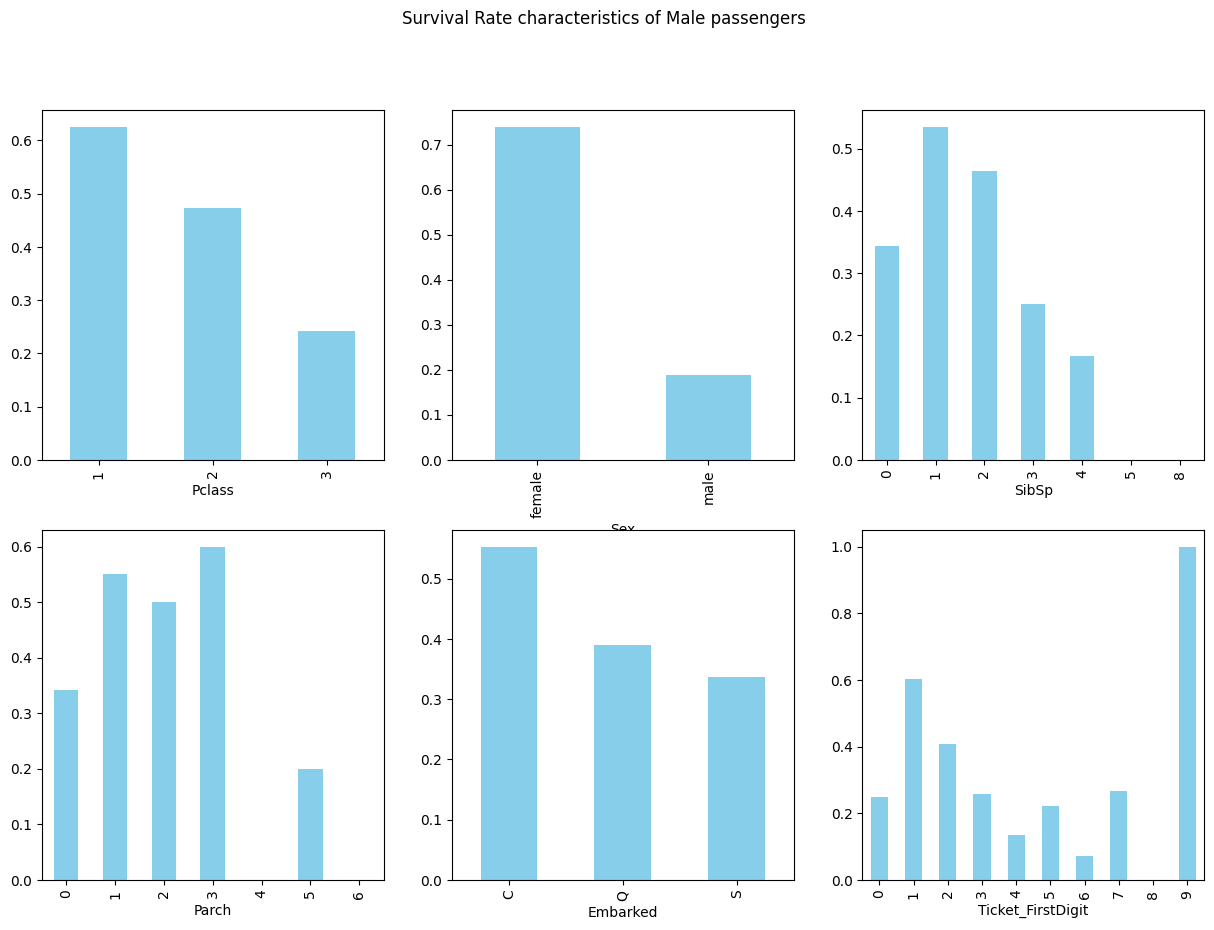

In [ ]:
# Make a subplot of every column in df_train as index for the pivot table
df_train_analisis = df_train.drop(columns=['PassengerId', 'Name', 'Age','Survived', 'Fare', 'TicketPrefix', ])
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Survival Rate characteristics of Male passengers')

for i, col in enumerate(df_train_analisis.columns):
    pivot = df_train.pivot_table(index=col, columns='Survived', aggfunc='size', fill_value=0)
    # Survival rate by column
    pivot['Survival Rate'] = pivot[1] / (pivot[0] + pivot[1])
    pivot['Survival Rate'].plot(kind='bar', ax=axs[i//3, i%3], color='skyblue')

plt.tight_layout()
plt.show()

In [ ]:
# Make a subplot of every column in df_train as index for the pivot table
df_train_analisis = male_survived.drop(columns=['PassengerId', 'Name', 'Ticket', 'Age','Survived', 'Fare', 'Sex'])
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Survival Rate characteristics of Male passengers')

for i, col in enumerate(df_train_analisis.columns):
    pivot = male_survived.pivot_table(index=col, columns='Survived', aggfunc='size', fill_value=0)
    # Survival rate by column
    pivot['Survival Rate'] = pivot[1] / (pivot[0] + pivot[1])
    pivot['Survival Rate'].plot(kind='bar', ax=axs[i//3, i%3], color='skyblue')

plt.tight_layout()
plt.show()


# #Visuization: 
# pivot_class_survived = df_train.pivot_table(index='Embarked', columns='Survived', aggfunc='size', fill_value=0)

# #Survival rate by class
# pivot_class_survived['Survival Rate'] = pivot_class_survived[1] / (pivot_class_survived[0] + pivot_class_survived[1])
# print(pivot_class_survived)

# # Plotting the survival rate by class
# pivot_class_survived['Survival Rate'].plot(kind='bar', color='skyblue')
# plt.ylabel('Survival Rate')
# plt.title('Survival Rate by Passenger Class')
# plt.show()

In [ ]:
# Make a subplot of every column in df_train as index for the pivot table
df_train_analisis = female_survived.drop(columns=['PassengerId', 'Name', 'Ticket', 'Age', 'Fare', 'Survived', 'Sex'])
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Survival Rate characteristics of Female passengers')

for i, col in enumerate(df_train_analisis.columns):
    pivot = female_survived.pivot_table(index=col, columns='Survived', aggfunc='size', fill_value=0)
    # Survival rate by column
    pivot['Survival Rate'] = pivot[1] / (pivot[0] + pivot[1])
    pivot['Survival Rate'].plot(kind='bar', ax=axs[i//3, i%3], color='skyblue')

plt.tight_layout()
plt.show()


In [ ]:
df_train.columns

In [ ]:
# Filtrar los pasajeros que sobrevivieron
survived = df_train[df_train['Survived'] == 1]

# Crear el histograma directamente para 'Fare' de los que sobrevivieron
plt.hist(df_train['Survived'], bins=10, edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de Fare para Pasajeros Sobrevivientes')
plt.xlabel('Tarifa (Fare)')
plt.ylabel('Cantidad de Sobrevivientes')

# Mostrar el gráfico
plt.show()

In [ ]:
df_train['Fare'].describe()

In [ ]:
# Graph fare distribution
df_train['Fare'].plot(kind='hist', bins=100, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Show the id of the passenger who paid the most
print(df_train.loc[df_train['Fare'].idxmax()])